In [17]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import metpy.calc as mpy
import datetime as dt
from metpy.units import units
import xarray as xr
from pylab import *

In [39]:
## SIMPLE PLOTS ##

pdir = "/Users/rneale/Documents/NCAR/SCAM/conv_water_in_rad/"
#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']

cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100b','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101b']
cnames = ['CAM6','CAM6+4K','CAM5','CAM5+4K']




csuf = '.cam.h0.1992-12-18-64800.nc'

#vname = 'RELHUM'   ; vscale = 1.
#vname = 'Q'   ; vscale = 1000.
vname = 'T'   ; vscale = 1.
#vname = 'CLOUD' ; vscale = 100.
#vname = 'CLDICE'   ; vscale = 1000.
#vname = 'CLDLIQ' ; vscale = 1000.
#vname = 'CLDLIQZM' ; vscale = 1000.
#vname = 'DLFZM' ; vscale = 1000.
#vname = 'QRS' ; vscale = 86400.

vname1d = 'SWCF' ; vscale1d = 1.
#vname1d = 'CLDLOW' ; vscale1d = 1.


File read in -> FSCAM.T42_T42.togaII.100
File read in -> FSCAM.T42_T42.togaII.100b
File read in -> FSCAM.T42_T42.togaII.101
File read in -> FSCAM.T42_T42.togaII.101b
 -- 1d filed --> SWCF
File read in -> FSCAM.T42_T42.togaII.100
-190.90192
File read in -> FSCAM.T42_T42.togaII.100b
-300.74582
File read in -> FSCAM.T42_T42.togaII.101
-153.12726
File read in -> FSCAM.T42_T42.togaII.101b
-154.30681


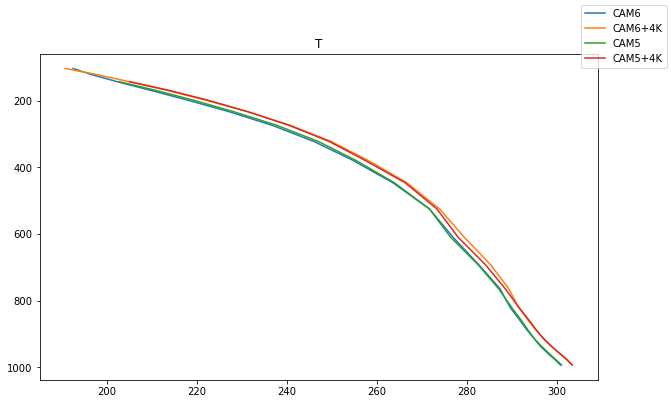

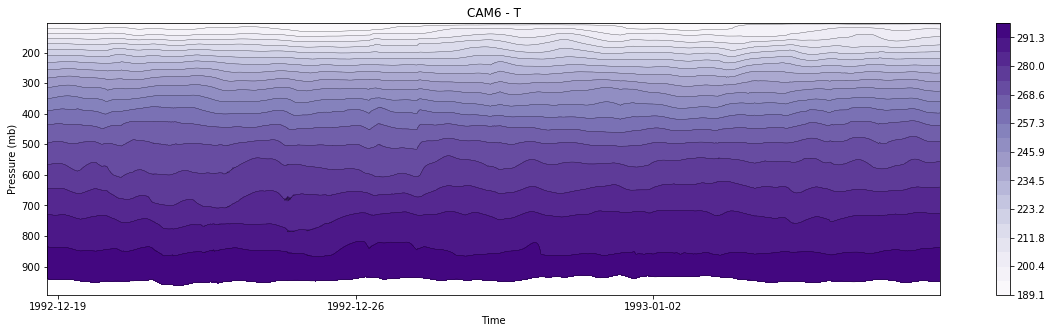

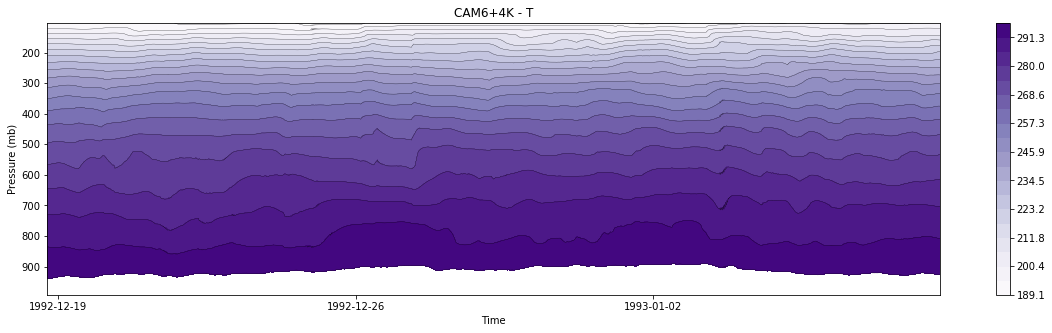

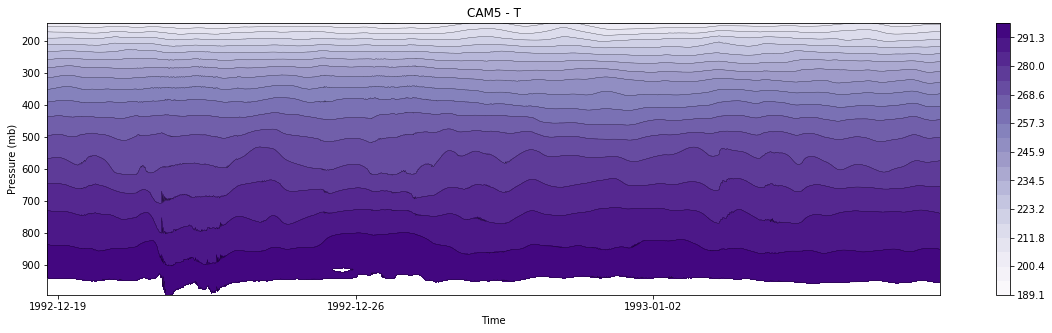

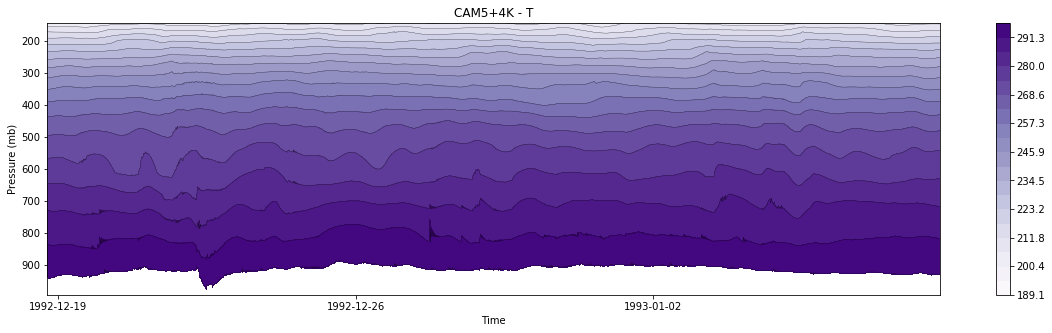

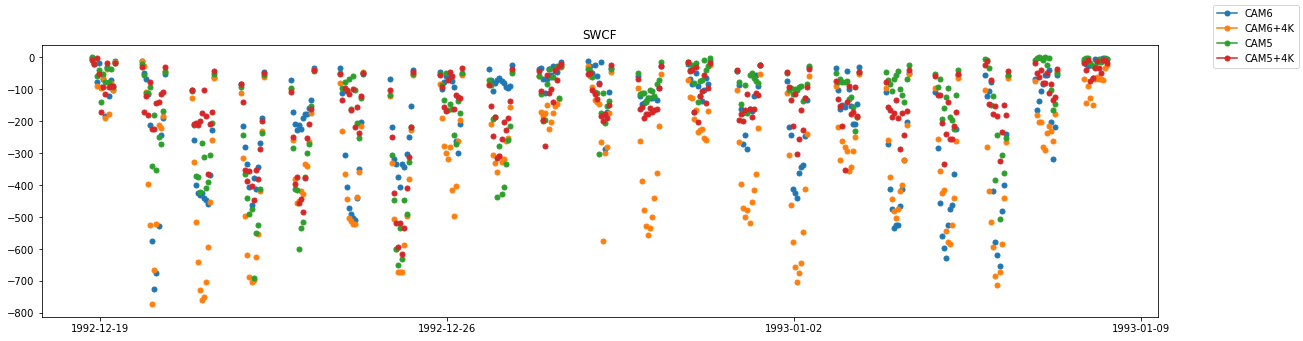

In [41]:
plt1av, ax1av = mp.subplots(figsize=(10, 6))

for ic in range(0,len(cnames)):
   
    plt1, ax1 = mp.subplots(figsize=(20, 5))
    
    scam_in = xr.open_dataset(pdir+cases[ic]+csuf)
    print('File read in -> '+cases[ic])

    pvar = scam_in[vname][:,10::,0,0].transpose()
    pvar = pvar*vscale
    
    dlev = (pvar.max().values-pvar.min().values)/20

    if ic == 0: plevels = np.arange(pvar.min().values,pvar.max().values,dlev,dtype=np.float)
    
    ax1.set_title(cnames[ic])
    ax1.set_ylabel('Pressure (mb)') 
    ax1.set_xlabel("Time")  

    plt1 = mp.contourf(pvar.time.values,pvar.lev,pvar,levels=plevels,cmap='Purples') 
    mp.colorbar(plt1, extend='both')
    plt1 = mp.contour(pvar.time.values,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.25) 
    ax1.invert_yaxis()  
    ax1.set_title(cnames[ic]+' - '+vname)

    pvarm = pvar.mean(axis=1)
    ax1av.plot(pvarm,pvarm.lev)
    
    
#ax1av.set_ylim(ax1.get_ylim()[::-1])
ax1av.set_title(vname)            
ax1av.invert_yaxis()  
plt1av.legend(cnames)
plt1av.savefig('scam_'+vname+'.png', dpi=300)
 
    
## 1d timeseries ##
    
plt2, ax2 = mp.subplots(figsize=(20, 5))

print(" -- 1d filed --> "+vname1d)

for ic1 in range(0,len(cnames)):
    
    scam_in = xr.open_dataset(pdir+cases[ic1]+csuf)
    print('File read in -> '+cases[ic1])

    pvar = scam_in[vname1d][:,0,0]
    pvar[pvar == 0.] = np.nan
    
# Interpolate for radiation variable (missing non-rad tsteps)
    
    pvar = pvar*vscale1d

    ax2.plot(pvar.time.values,pvar,'-o',markersize = 5)
    print(pvar.mean(axis=0).values)
    
ax2.set_title(vname1d)   
plt2.legend(cnames)
plt2.savefig('scam_'+vname1d+'.png', dpi=300)  
    
    